In [97]:
import json
import cv2

from pycocotools.cocoeval import COCOeval

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [98]:
path = '/Users/yuxiangzhang/Desktop/Kaikeba/名企课/CV_mingqi/Week_4/Homework/annotations/instances_val2017.json'

with open(path) as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [4]:
def get_sample_image(index):
    """
        annotation{
            "id": int, "image_id": int, 
            "category_id": int, 
            "segmentation": RLE or [polygon], 
            "area": float, 
            "bbox": [x,y,width,height], 
            "iscrowd": 0 or 1, }
    
        categories[{
            "id": int, 
            "name": str, 
            "supercategory": str,}]
            
        image{
            "id": int, 
            "width": int, 
            "height": int, 
            "file_name": str, 
            "license": int, 
            "flickr_url": str, 
            "coco_url": str, 
            "date_captured": datetime,}

    """
    return data['images'][index], data['categories'][index], data['annotations'][index]

image, cat, anno = get_sample_image(4)
print(f'image: {image} \n\ncategory: {cat} \n\nAnnotation: {anno}')

image: {'license': 6, 'file_name': '000000174482.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000174482.jpg', 'height': 388, 'width': 640, 'date_captured': '2013-11-14 23:16:55', 'flickr_url': 'http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg', 'id': 174482} 

category: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'} 

Annotation: {'segmentation': [[200.61, 253.97, 273.19, 318.49, 302.43, 336.64, 357.87, 340.67, 402.23, 316.48, 470.78, 331.6, 521.19, 321.52, 583.69, 323.53, 598.81, 287.24, 600.83, 236.84, 584.7, 190.46, 580.66, 169.29, 531.27, 121.91, 472.8, 93.69, 420.38, 89.65, 340.74, 108.81, 295.37, 119.9, 263.11, 141.07, 233.88, 183.41, 213.72, 229.78, 200.61, 248.93]], 'area': 75864.53530000002, 'iscrowd': 0, 'image_id': 579321, 'bbox': [200.61, 89.65, 400.22, 251.02], 'category_id': 18, 'id': 3419}


In [5]:
dataDir='.'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [7]:
print(annFile)
# initialize COCO api for instance annotations
coco=COCO(annFile)

./annotations/instances_val2017.json
loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


In [9]:
# The following API functions are defined:
#  COCO       - COCO api class that loads COCO annotation file and prepare data structures.
#  decodeMask - Decode binary mask M encoded via run-length encoding.
#  encodeMask - Encode binary mask M using run-length encoding.
#  getAnnIds  - Get ann ids that satisfy given filter conditions.
#  getCatIds  - Get cat ids that satisfy given filter conditions.
#  getImgIds  - Get img ids that satisfy given filter conditions.
#  loadAnns   - Load anns with the specified ids.
#  loadCats   - Load cats with the specified ids.
#  loadImgs   - Load imgs with the specified ids.
#  annToMask  - Convert segmentation in an annotation to binary mask.
#  showAnns   - Display the specified annotations.
#  loadRes    - Load algorithm results and create API for accessing them.
#  download   - Download COCO images from mscoco.org server.

In [17]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture electronic animal accessory person indoor appliance sports vehicle kitchen food outdoor


In [28]:
coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

{'license': 2,
 'file_name': '000000279278.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000279278.jpg',
 'height': 429,
 'width': 640,
 'date_captured': '2013-11-15 01:07:24',
 'flickr_url': 'http://farm7.staticflickr.com/6101/6275412942_f8dc734c3f_z.jpg',
 'id': 279278}

In [70]:
# get all images containing given categories, select one at random
# Provide the Category from catNms parameter, returns the corresponding catID
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# Return the images which contain all the categories in CatIds.
imgIds = coco.getImgIds(catIds=catIds);
# Choose a random one
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [152]:
img

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

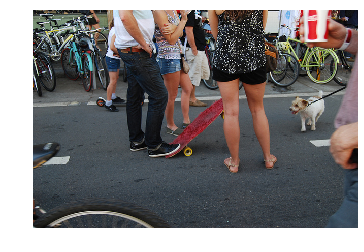

In [71]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

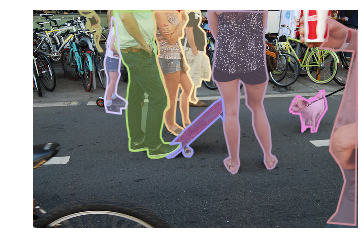

In [75]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

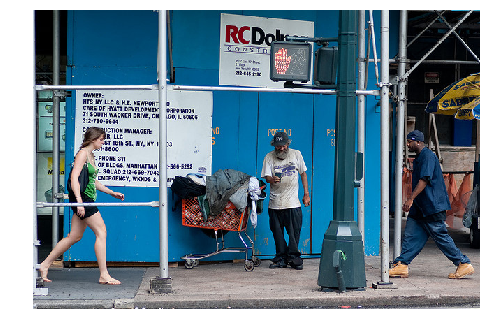

In [105]:
# Read image
img = coco.loadImgs(252219)[0]

I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [108]:
print(img)

{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg', 'id': 252219}


[481918, 489768, 495624, 1424143, 1437313, 1507017, 1804847]

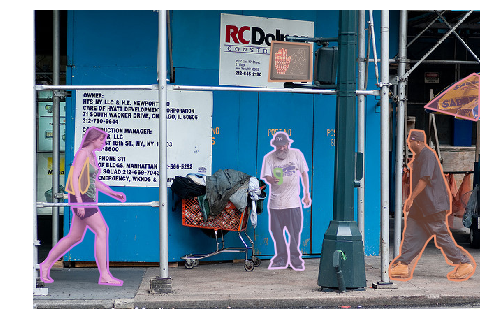

In [106]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [111]:
annIDs = coco.getAnnIds(imgIds=img['id'], iscrowd=None)

In [112]:
selected_ann = annIDs[0]

In [141]:
coco.loadAnns(selected_ann)[0]

{'segmentation': [[361.81,
   368.51,
   337.11,
   369.76,
   342.14,
   359.72,
   340.46,
   358.04,
   348.0,
   350.51,
   345.9,
   332.09,
   341.3,
   322.04,
   338.37,
   314.5,
   338.37,
   293.57,
   336.27,
   281.01,
   339.21,
   261.75,
   339.21,
   249.61,
   333.46,
   245.82,
   331.8,
   241.68,
   326.28,
   240.57,
   327.66,
   230.08,
   330.14,
   216.54,
   331.25,
   209.91,
   338.27,
   204.44,
   341.82,
   202.44,
   346.91,
   199.51,
   346.14,
   195.5,
   343.2,
   193.8,
   340.89,
   192.72,
   340.58,
   188.55,
   341.51,
   185.77,
   344.44,
   184.69,
   344.75,
   183.15,
   344.75,
   180.68,
   349.22,
   175.49,
   353.54,
   174.56,
   358.48,
   175.03,
   362.34,
   177.03,
   364.34,
   179.65,
   364.96,
   183.36,
   366.97,
   185.36,
   369.74,
   185.98,
   371.9,
   187.21,
   367.58,
   189.99,
   367.74,
   193.54,
   365.89,
   194.78,
   366.19,
   196.63,
   368.66,
   198.17,
   372.21,
   198.48,
   377.3,
   199.25,
   3

In [145]:
bbox = coco.loadAnns(selected_ann)[0]['bbox']
category_id = coco.loadAnns(selected_ann)[0]['category_id']
category_name = coco.loadCats([1])
print(category_name, bbox)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}] [326.28, 174.56, 71.24, 197.25]


In [157]:
bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]

(326.28, 174.56, 397.52, 371.81)

In [184]:
# Read image
image_name = './val2017/000000252219.jpg'
image = cv2.imread(image_name)

# Copy image as original
org = image.copy()

start_x = int(bbox[0])
start_y = int(bbox[1])
end_x = int(bbox[0]+bbox[2])
end_y = int(bbox[1]+bbox[3])


font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(org, category_name[0]['name'], (start_x ,start_y-10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

cv2.rectangle(org, (start_x, start_y), (end_x, end_y), (255, 0, 0), 2)

# Show image
cv2.imshow('Original', org)
cv2.waitKey(500)

-1